# Python データビジュアライゼーション入門

## Ch.05 さまざまなグラフ・チャートによるビジュアライゼーション

- Sec.01 グラフやチャートで利用するライブラリ
- Sec.02 ヒストグラム
- Sec.03 ボックスプロット
- Sec.04 散布図
- Sec.05 バブルチャート
- Sec.06 散布図行列
- Sec.07 ジョイントプロット
- Sec.08 質的変数のプロット
- Sec.09 平行座標プロット

In [1]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline
import plotly.subplots
import seaborn as sns
import squarify
from IPython.display import display

### Sec.02 ヒストグラム

- サンプルデータ「tips」
  - レストランで働く店員が受け取ったチップの金額に関するデータセット
- distplot関数は非推奨
- [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html)

In [2]:
tips = sns.load_dataset("tips")
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


list5.3 ヒストグラムの基本的な描画1

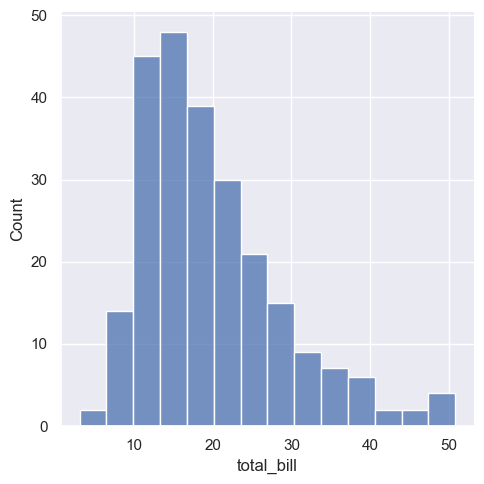

In [20]:
# ked=True: カーネル密度関数の描画
sns.set_theme(style="darkgrid")
sns.displot(data=tips, x="total_bill", kde=False)

list5.4 ヒストグラムの基本的描画2

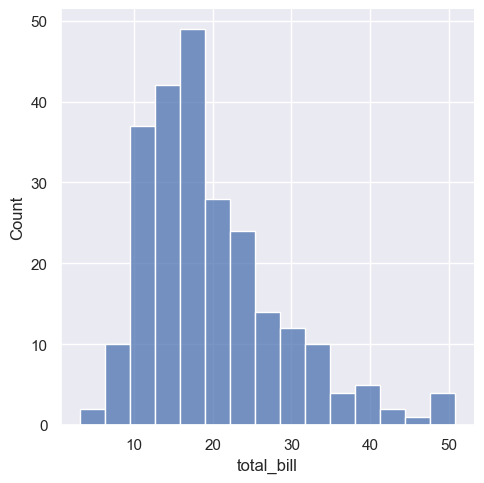

In [27]:
# binsの設定
sns.displot(data=tips, x="total_bill", kde=False, bins=15)

list5.5 ヒストグラムの基本的描画3

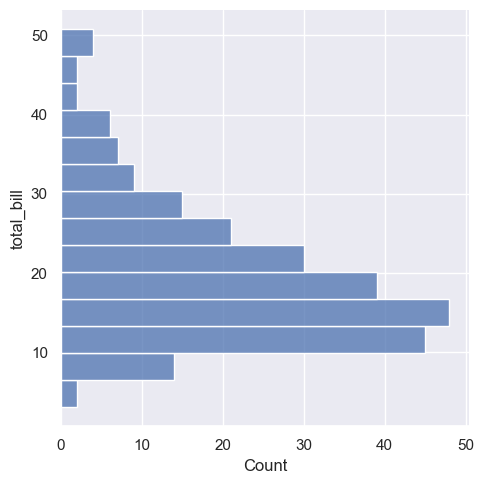

In [22]:
# 縦向きのグラフに設定
sns.displot(data=tips, y="total_bill", kde=False)

２つのヒストグラムを描画する

list5.6 ヒストグラムの応用的な描画

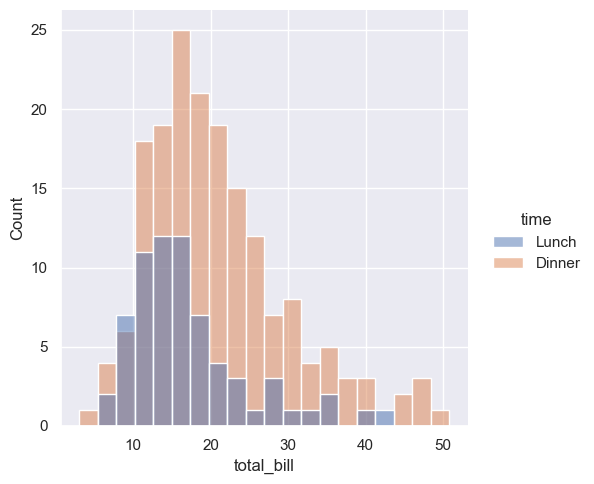

In [23]:
sns.displot(data=tips, x="total_bill", hue="time", bins=20)

#### カウントプロット

- [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

list5.7 カウントプロットの描画例1

<AxesSubplot: xlabel='smoker', ylabel='count'>

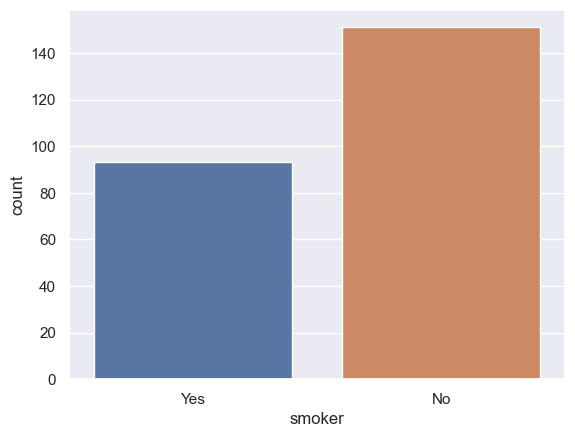

In [24]:
sns.countplot(data=tips, x="smoker")

list5.8 カウントプロットの描画例2

カラムの値ごとに色分けする

<AxesSubplot: xlabel='smoker', ylabel='count'>

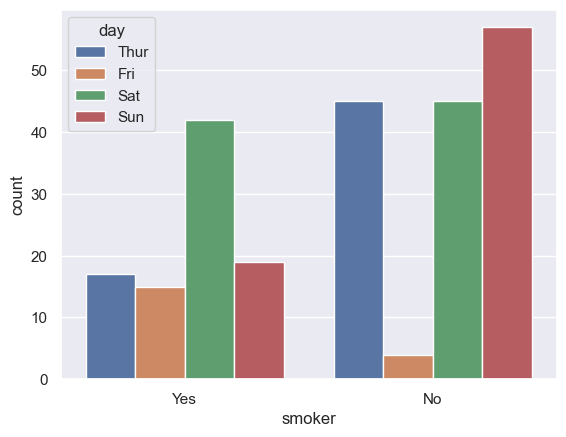

In [26]:
sns.countplot(data=tips, x="smoker", hue="day")

### Sec.03 ボックスプロット

- [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

list5.9 ボックスプロットの描画例1

<AxesSubplot: ylabel='total_bill'>

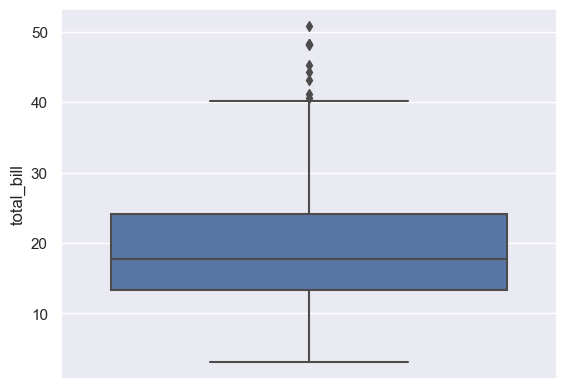

In [28]:
sns.set_theme(style="darkgrid")
sns.boxplot(data=tips, y="total_bill")

#### ２つのデータをボックスプロットで比較する

list5.10 ボックスプロット描画例2

<AxesSubplot: xlabel='time', ylabel='total_bill'>

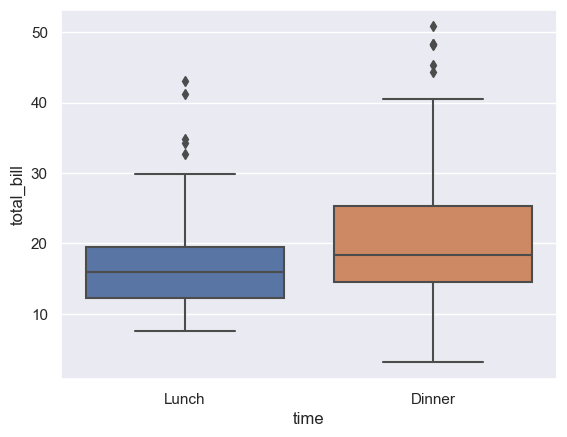

In [29]:
sns.boxplot(data=tips, x="time", y="total_bill")

#### 表示する順番を変更する

list5.11 ボックスプロットの描画例3

<AxesSubplot: xlabel='time', ylabel='tip'>

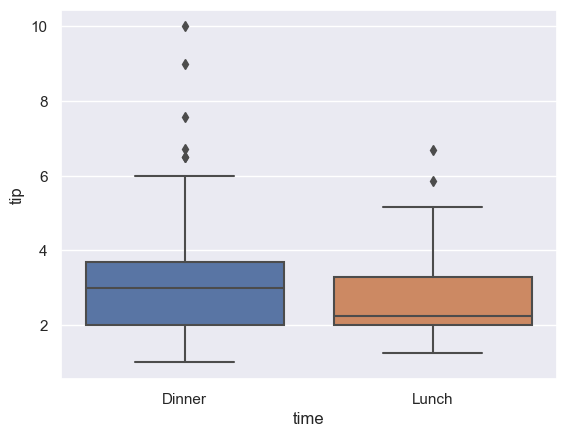

In [31]:
sns.boxplot(data=tips, x="time", y="tip", order=["Dinner", "Lunch"])

#### 属性によってさらに細かく分けて比較する

list5.12 ボックスプロットの描画例4

<AxesSubplot: xlabel='day', ylabel='total_bill'>

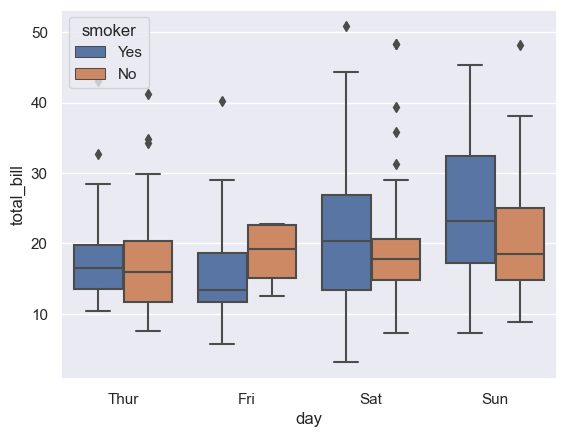

In [32]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker")

### Sec.04 散布図

- [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

list5.13 散布図の描画例1

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

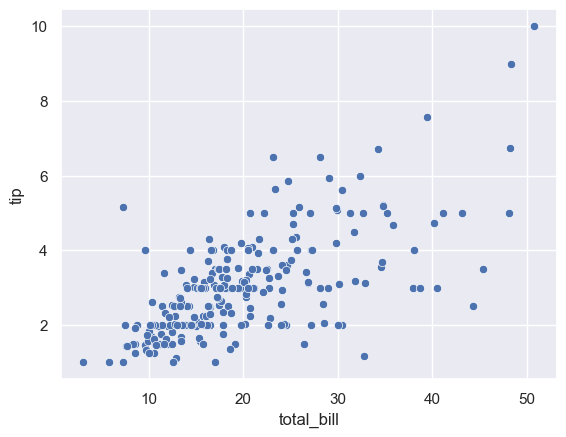

In [33]:
sns.set_theme(style="darkgrid")
sns.scatterplot(data=tips, x="total_bill", y="tip")

#### 色を変える

list5.14 散布図の描画例2

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

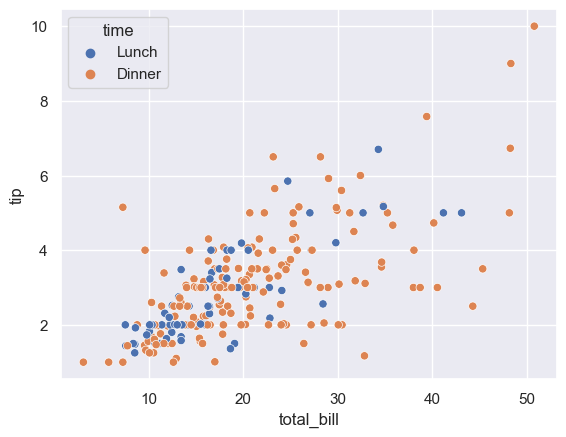

In [34]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

#### 形を変える

list5.15 散布図の描画例3

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

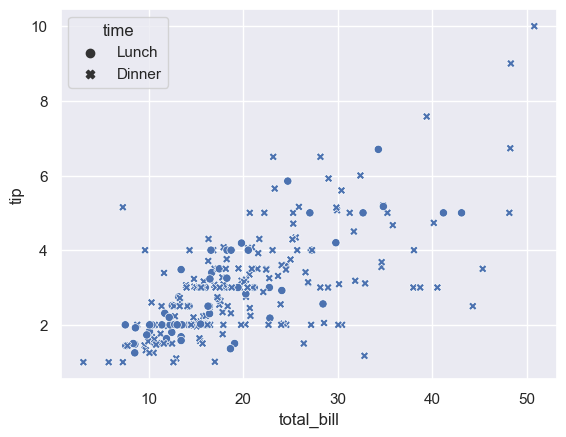

In [35]:
sns.scatterplot(data=tips, x="total_bill", y="tip", style="time")

#### 重なりが多いときの工夫

list5.16 散布図の描画例4

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

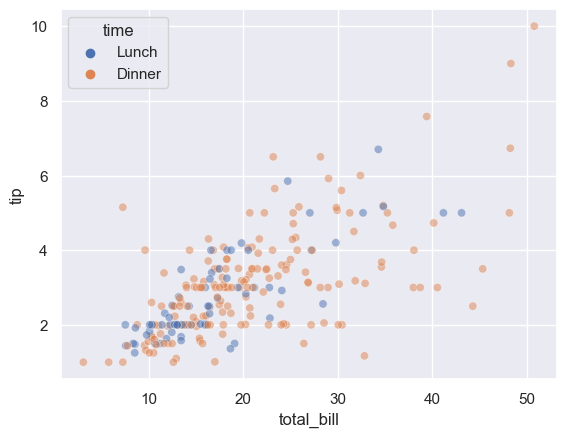

In [36]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", alpha=0.5)

### Sec.05 バブルチャート

- [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

list5.17 バブルチャートの描画例1

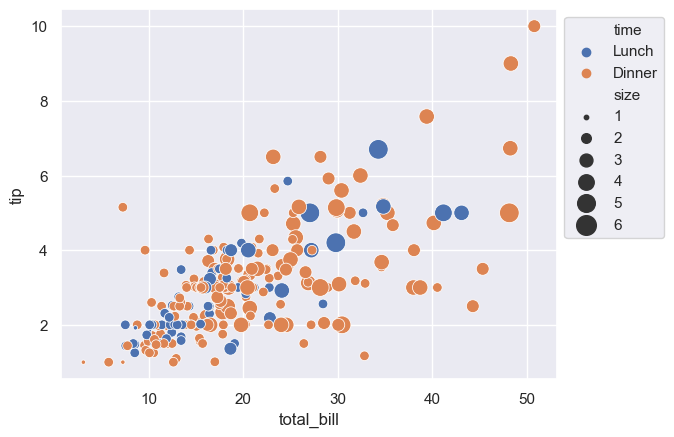

In [37]:
sns.set_theme(style="darkgrid")
ax = sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="time", size="size", sizes=(10, 200)
)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

#### plotlyでバブルチャートを描画する

- [plotly.express.scatter](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)
- [Scatter Plots in Python](https://plotly.com/python/line-and-scatter/)

list5.18 バブルチャートの描画例2

In [3]:
fig = px.scatter(
    data_frame=tips, x="total_bill", y="tip", size="size", color="time", size_max=50
)
fig.show()

### Sec.06 散布図行列

- [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

#### 散布図行列を作成する

list5.19 散布図行列の描画例1

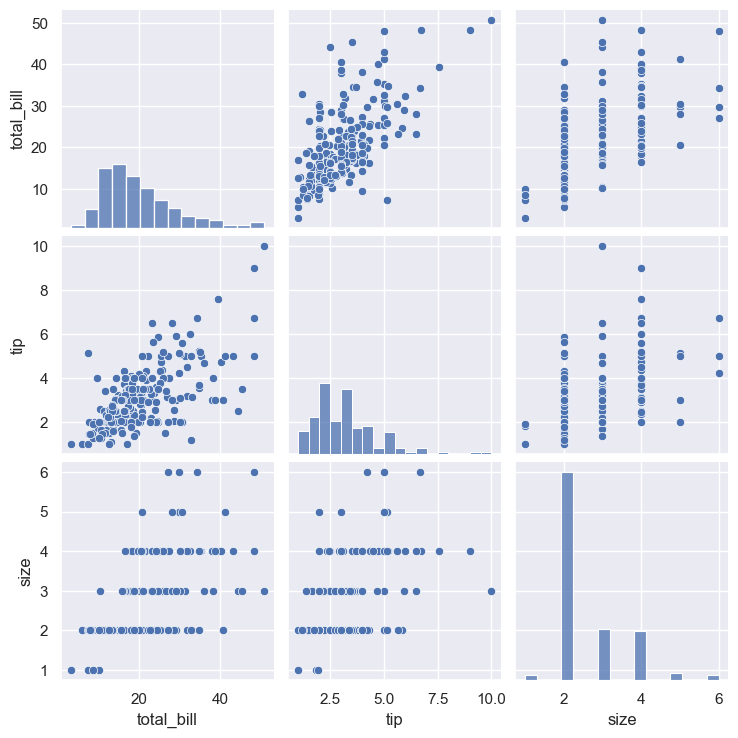

In [4]:
sns.set_theme(style="darkgrid")
sns.pairplot(data=tips)

#### 散布図行列の設定を指定する

list5.20 散布図行列の描画例2

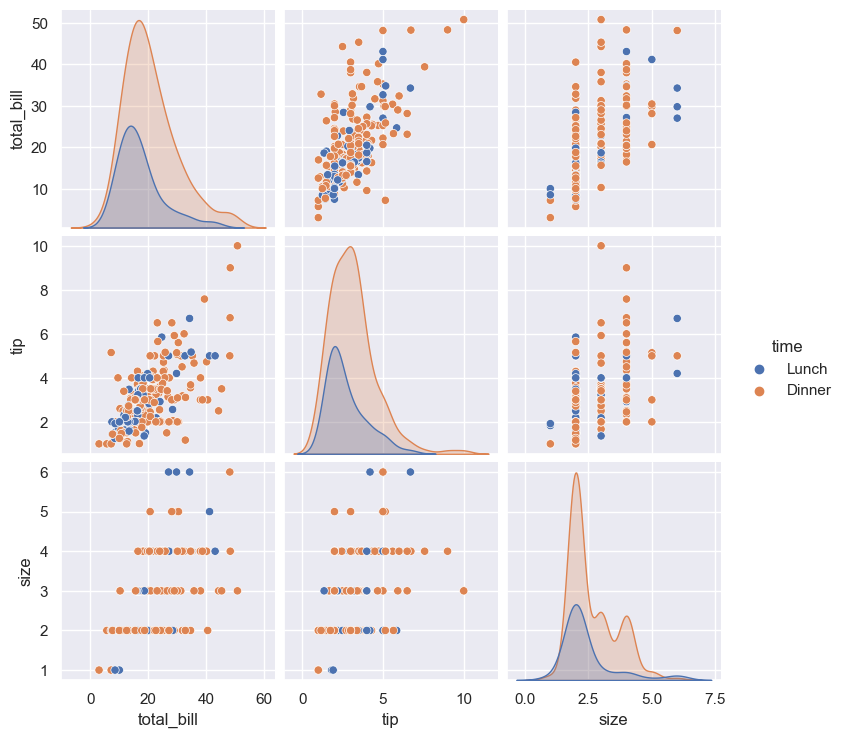

In [5]:
sns.pairplot(data=tips, hue="time")

### Sec.07 ジョイントプロット

- [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

list5.21 ジョイントプロットの描画例1

ヒストグラムと散布図の組み合わせ

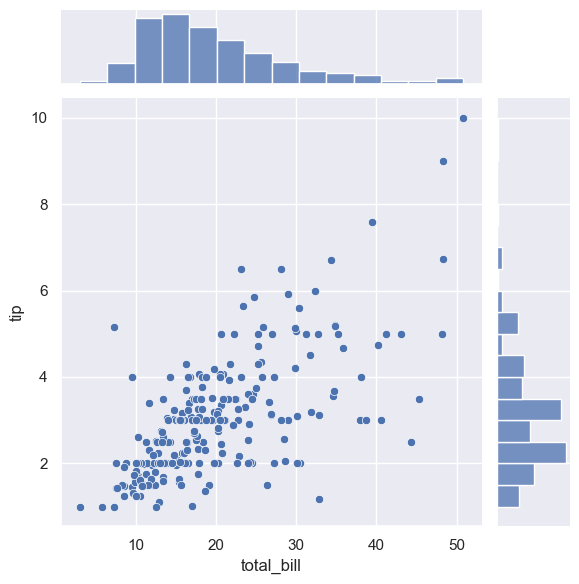

In [6]:
sns.set_theme(style="darkgrid")
sns.jointplot(data=tips, x="total_bill", y="tip")

#### 色の変更

list5.22 ジョイントプロットの描画例2

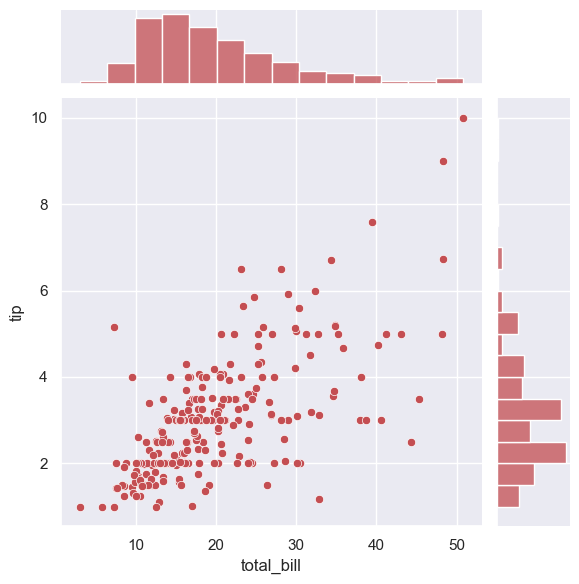

In [7]:
sns.jointplot(data=tips, x="total_bill", y="tip", color="red")

#### 六角形のビンで表示

list5.23 ジョイントプロットの描画例

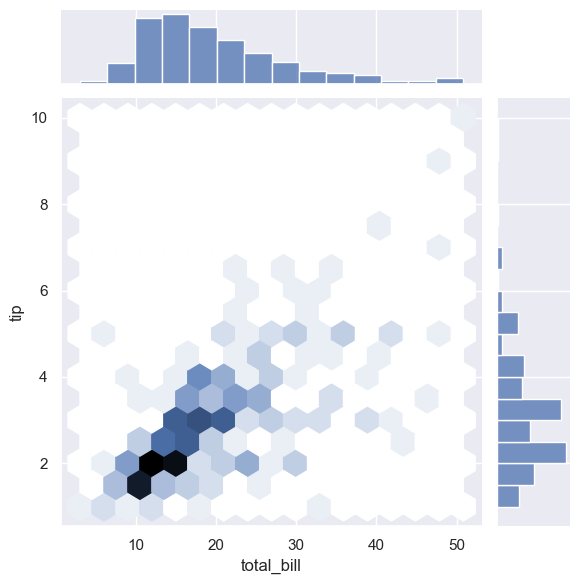

In [8]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")

### Sec.08 質的変数のプロット

- ２つの変数のうち一方が質的変数の場合の関係性を確認する際に用いる方法
- [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

list5.24 質的変数のプロットの描画例

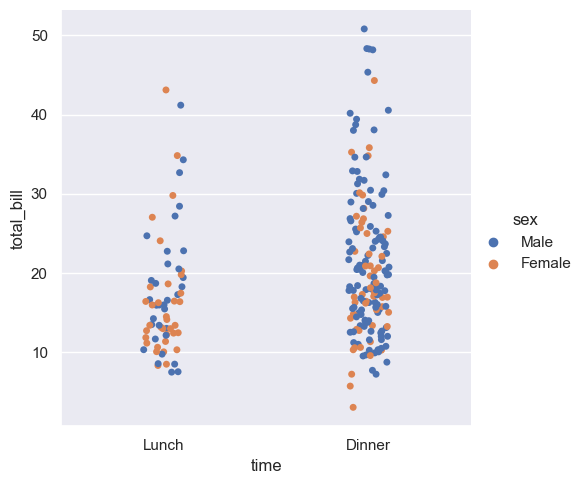

In [9]:
sns.set_theme(style="darkgrid")
sns.catplot(data=tips, x="time", y="total_bill", hue="sex")

### Sec.09 平行座標プロット

- 複数の変数の関係性を確認する際に用いる方法

#### 平行座標プロットを描画する

- [Parallel Coordinates Plot in Python](https://plotly.com/python/parallel-coordinates-plot/)

list5.24 平行座標の描画例

In [10]:
fig = px.parallel_coordinates(tips, dimensions=["total_bill", "tip", "size"])
fig.show()

/Users/takeru/@LEARNING/Python/Introduction_to_Python_Data_Visualization_SE/venv/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



#### 質的変数を比較するパラレルセットグラフを描画する

- [plotly/Parallel Categories Diagram in Python](https://plotly.com/python/parallel-categories-diagram/)

list5.26 パラレルセットグラフの描画例

In [11]:
fig = px.parallel_categories(tips)
fig.show()

/Users/takeru/@LEARNING/Python/Introduction_to_Python_Data_Visualization_SE/venv/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

